In [1]:
import pandas as pd
import numpy as np
file_path = 'bank-full.csv'
old_df = pd.read_csv(file_path)
old_df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [2]:
def split_column(row):
    return row.strip().split(';')

split_data = old_df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].apply(split_column)
df = pd.DataFrame(split_data.tolist())

print(df)

       0               1           2            3     4     5      6      7   \
0      58    "management"   "married"   "tertiary"  "no"  2143  "yes"   "no"   
1      44    "technician"    "single"  "secondary"  "no"    29  "yes"   "no"   
2      33  "entrepreneur"   "married"  "secondary"  "no"     2  "yes"  "yes"   
3      47   "blue-collar"   "married"    "unknown"  "no"  1506  "yes"   "no"   
4      33       "unknown"    "single"    "unknown"  "no"     1   "no"   "no"   
...    ..             ...         ...          ...   ...   ...    ...    ...   
45206  51    "technician"   "married"   "tertiary"  "no"   825   "no"   "no"   
45207  71       "retired"  "divorced"    "primary"  "no"  1729   "no"   "no"   
45208  72       "retired"   "married"  "secondary"  "no"  5715   "no"   "no"   
45209  57   "blue-collar"   "married"  "secondary"  "no"   668   "no"   "no"   
45210  37  "entrepreneur"   "married"  "secondary"  "no"  2971   "no"   "no"   

                8   9      10    11 12 

In [3]:
columns = df.columns
columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 
           'housing', 'loan', 'contact', 'day', 'month', 
           'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df.columns = columns
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [4]:
df = df.drop('loan', axis=1)

In [22]:
df = df.drop('default', axis=1)

<p>Вопрос 1</p>

In [23]:
mode_value = df['education'].mode().values[0]
print('Наиболее встречаемое значение в столбце education' ': ', mode_value)

Наиболее встречаемое значение в столбце education:  "secondary"


<p>Вопрос 2</p>

In [24]:
df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']] = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].astype(int)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,"job_""blue-collar""","job_""entrepreneur""",...,"month_""jul""","month_""jun""","month_""mar""","month_""may""","month_""nov""","month_""oct""","month_""sep""","poutcome_""other""","poutcome_""success""","poutcome_""unknown"""
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


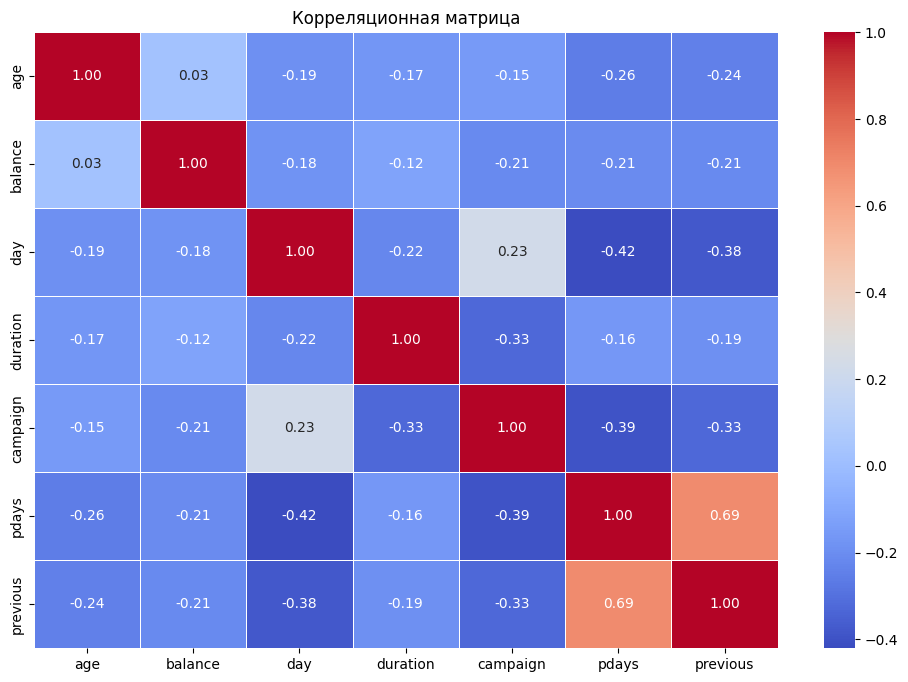

In [29]:
columns_cor = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
c_m = columns_cor.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(c_m.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [30]:
max_corr = 0
max_pair = (None, None)
for i in range(len(c_m.columns)):
    for j in range(i):
        corr_value = c_m.iloc[i, j]
        if abs(corr_value) > abs(max_corr):
            max_corr = corr_value
            max_pair = (c_m.columns[i], c_m.columns[j])
print(f"Наибольшая корреляция: {max_corr} между '{max_pair[0]}' и '{max_pair[1]}'")

Наибольшая корреляция: 0.4548196354805043 между 'previous' и 'pdays'


<p>Вопрос 3</p>

In [40]:
df_encoded['y'] = df_encoded['y'].replace({'"yes"': 1, '"no"': 0})

In [41]:
df_encoded[['y']] = df_encoded[['y']].astype(int)

In [85]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mutual_info_score

In [43]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [35]:
mutual_info_scores = {}
for column in X_train.columns:
    score = mutual_info_score(X_train[column], y_train)
    mutual_info_scores[column] = score
max_feature = max(mutual_info_scores, key=mutual_info_scores.get)
max_score = mutual_info_scores[max_feature]

print(f"Переменная с наибольшей взаимной информацией: {max_feature} (взаимная информация: {max_score:.2f})")

Переменная с наибольшей взаимной информацией: balance (взаимная информация: 0.12)


In [36]:
print(f"contact: {mutual_info_score(X_train['contact'], y_train):.2f}")
print(f"education: {mutual_info_score(X_train['education'], y_train):.2f}")
print(f"housing: {mutual_info_score(X_train['housing'], y_train):.2f}")
print(f"poutcome: {mutual_info_score(X_train['poutcome'], y_train):.2f}")

contact: 0.01
education: 0.00
housing: 0.01
poutcome: 0.03


<p>Вопрос 4</p>

In [44]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver = 'liblinear', C = 1.0, max_iter=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
original_accuracy = round(accuracy_score(y_val, y_pred),2)
print(f"Полученная точность: {original_accuracy}")

Полученная точность: 0.9


<p>Вопрос 5</p>

In [52]:
categorical_features = {
    'marital': [col for col in X_train.columns if col.startswith('marital')],
    'age': ['age'],
    'balance': ['balance'],
    'previous': ['previous']
}

def train_without_encoded_feature(feature_group):
    X_train_reduced = X_train.drop(columns=feature_group)
    X_val_reduced = X_val.drop(columns=feature_group)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_reduced, y_train)

    y_val_pred = model.predict(X_val_reduced)
    return accuracy_score(y_val, y_val_pred)

for feature, cols in categorical_features.items():
    accuracy_without_feature = train_without_encoded_feature(cols)
    accuracy_drop = original_accuracy - accuracy_without_feature
    print(feature, round(accuracy_drop, 4))

marital -0.0002
age -0.0007
balance -0.0008
previous -0.0009


<p>Вопрос 6</p>

In [56]:
C_values = [0.01, 0.1, 1, 10, 100]

def train(C_):

    model = LogisticRegression(solver='liblinear', C=C_, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    return round(accuracy_score(y_val, y_val_pred), 3)

for C_ in C_values:
    print('При параметре ', C_, 'получаем точность ', train(C_))


При параметре  0.01 получаем точность  0.898
При параметре  0.1 получаем точность  0.9
При параметре  1 получаем точность  0.901
При параметре  10 получаем точность  0.9
При параметре  100 получаем точность  0.901
